In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_1 = pd.read_csv('ACT1_train_450.csv')

In [3]:
train_1.head(5)

,Unnamed: 0,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,1,0,0,0,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,3,0,0,0,0,0,0,0,1,0,...,0,0,2,2,3,2,1,1,1,6.1797
4,4,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [4]:
knn = pd.read_csv('450 features with labels_10clusters.csv')

In [5]:
labels = np.array(knn['label'])

In [6]:
#adding labels to data
from sklearn.model_selection import train_test_split
import numpy as np
y = train_1['Act'].values
y = np.reshape(y,(len(y),1))
labels = np.reshape(labels,(len(labels),1))
y = np.hstack((y,labels))

In [7]:
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values

In [9]:
#Adding Labels to Data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
Y_train_labels = Y_train[:,1]
Y_train = Y_train[:,0]
Y_test_labels = Y_test[:,1]
Y_test = Y_test[:,0]
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))

(29792,) (29792, 442) (7449,) (7449, 442)


(7449, 1)

In [10]:
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

In [11]:
from keras import backend as K
#Keras R_2 function
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Using TensorFlow backend.


In [12]:
from sklearn.metrics import make_scorer
#Keras MAPE function
MAPE = []
def mean_ape(y_true, y_pred):
    return K.mean(K.abs((y_true-y_pred)/y_true))*100
#Scikit learn mape function
def mean_apes(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape_func = make_scorer(mean_apes)

In [13]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [21]:
#Keras model
for epochs in [200]:
    for batch in [60]:
        K.clear_session()
        model = keras.models.Sequential();
        model.add(keras.layers.core.Dense(units = 50, activation='relu', input_dim = 442));
        model.add(keras.layers.core.Dense(units = 25, activation = 'relu'))
        model.add(keras.layers.core.Dense(1, activation = 'relu'));
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);
        model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination, mean_ape,'mae']);
        print(model.summary(), 'Epochs = ', epochs, 'Batch =', batch);
        history = model.fit(X_train, Y_train, epochs = epochs, batch_size= batch, verbose = 1);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None Epochs =  200 Batch = 60
Epoch 1/200
29792/29792 [==============================] - 1s 26us/step - loss: 0.6852 - coeff_determination: -0.8918 - mean_ape: 12.3837 - mean_absolute_error: 0.5889
Epoch 2/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.2854 - coeff_determination: 0.2613 - mean_ape: 8.3582 - mean_absolute_error: 0.4020
Epoch 3/200
29792/29792 [=============

29792/29792 [==============================] - 1s 19us/step - loss: 0.0715 - coeff_determination: 0.8112 - mean_ape: 3.8214 - mean_absolute_error: 0.1854
Epoch 94/200
29792/29792 [==============================] - 1s 19us/step - loss: 0.0701 - coeff_determination: 0.8157 - mean_ape: 3.7788 - mean_absolute_error: 0.1833
Epoch 95/200
29792/29792 [==============================] - 1s 19us/step - loss: 0.0719 - coeff_determination: 0.8113 - mean_ape: 3.8429 - mean_absolute_error: 0.1865
Epoch 96/200
29792/29792 [==============================] - 1s 19us/step - loss: 0.0702 - coeff_determination: 0.8116 - mean_ape: 3.7930 - mean_absolute_error: 0.1840
Epoch 97/200
29792/29792 [==============================] - 1s 20us/step - loss: 0.0709 - coeff_determination: 0.8077 - mean_ape: 3.8134 - mean_absolute_error: 0.1849
Epoch 98/200
29792/29792 [==============================] - 1s 20us/step - loss: 0.0697 - coeff_determination: 0.8140 - mean_ape: 3.7826 - mean_absolute_error: 0.1835
Epoch 99/20

29792/29792 [==============================] - 1s 19us/step - loss: 0.0528 - coeff_determination: 0.8597 - mean_ape: 3.2713 - mean_absolute_error: 0.1583
Epoch 190/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.0490 - coeff_determination: 0.8701 - mean_ape: 3.1384 - mean_absolute_error: 0.1519
Epoch 191/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.0486 - coeff_determination: 0.8699 - mean_ape: 3.1033 - mean_absolute_error: 0.1503
Epoch 192/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.0478 - coeff_determination: 0.8706 - mean_ape: 3.0675 - mean_absolute_error: 0.1485
Epoch 193/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.0493 - coeff_determination: 0.8692 - mean_ape: 3.1285 - mean_absolute_error: 0.1514
Epoch 194/200
29792/29792 [==============================] - 1s 18us/step - loss: 0.0499 - coeff_determination: 0.8664 - mean_ape: 3.1696 - mean_absolute_error: 0.1533
Epoch 

In [22]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'mean_ape', 'mean_absolute_error'])


In [23]:
print(model.evaluate(X_test, Y_test,verbose=False))

[0.18798344592421404, 0.46449811091469767, 5.639996703446576, 0.27752237991928846]


In [24]:
#Predict values
Y_predict = model.predict(X_test)

5.63999798217945

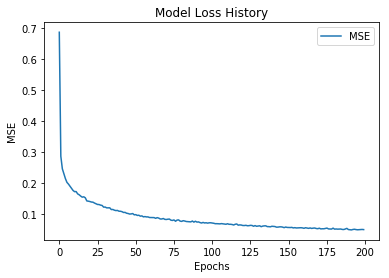

In [27]:
plt.plot(history.history['loss'])
plt.title('Model Loss History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['MSE'])


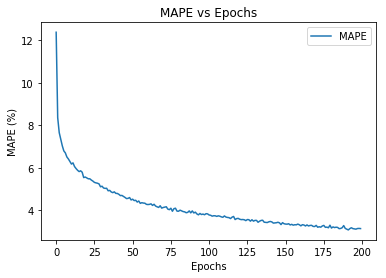

In [28]:
plt.plot(history.history['mean_ape'])
#plt.plot(history.history['mean_ape'])
plt.title('MAPE vs Epochs')
plt.ylabel('MAPE (%)')
plt.xlabel('Epochs')
plt.legend(['MAPE'])


6.411328618147735


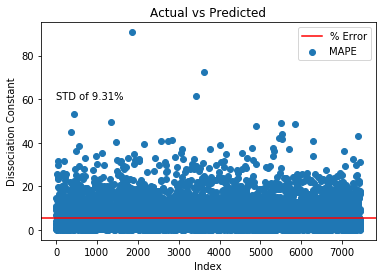

In [29]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
plt.scatter(range(np.shape(mask)[1]), comparison[mask])
plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.ylabel('Dissociation Constant')
plt.xlabel('Index')
plt.legend(['% Error', 'MAPE'])
plt.text(0.05, 60, 'STD of 9.31%')
print(comparison.std())

Text(40, 800, 'STD of 6.52%')

C:\Users\willi\Anaconda3\envs\data-x\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


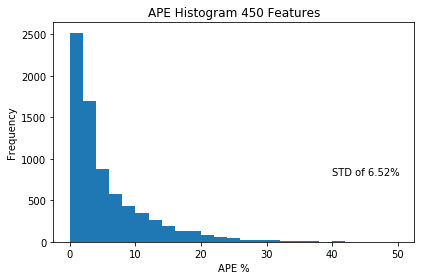

In [30]:
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,50,26))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 450 Features')
plt.text(40, 800, 'STD of 6.52%')

In [31]:
graph_data = pd.DataFrame({'APE':comparison,'Label':Y_test_labels})

In [32]:
graph_data.head()

,APE,Label
0,9.869471,0.0
1,0.530170,6.0
2,0.881458,1.0
3,2.614926,0.0
4,1.190086,9.0


In [33]:
graph_data = graph_data.sort_values('Label')

In [34]:
graph_data.head()

,APE,Label
0,9.869471,0.0
2184,8.071828,0.0
5788,0.217375,0.0
2178,8.794463,0.0
2177,13.706684,0.0


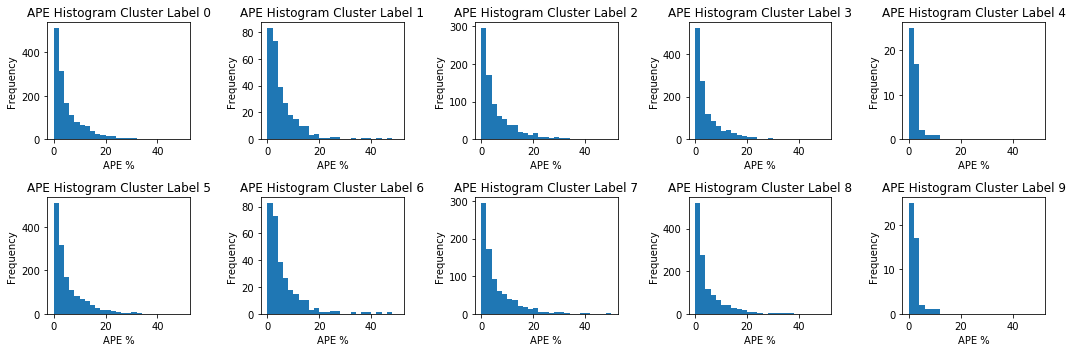

In [35]:
#Generate APE histogram for clusters
fig, ax= plt.subplots(2, 5,tight_layout=True, figsize= (15,5))
for cluster_label in range(0,5):
    title = 'APE Histogram Cluster Label ' + str(cluster_label)
    ax[0,cluster_label].hist(graph_data[graph_data['Label']== cluster_label]['APE'],np.linspace(0,50,26))
    ax[0,cluster_label].set_xlabel('APE %')
    ax[0,cluster_label].set_ylabel('Frequency')
    ax[0,cluster_label].set_title(title)
for cluster_label in range(0,5):
    title = 'APE Histogram Cluster Label ' + str(cluster_label+5)
    ax[1,cluster_label].hist(graph_data[graph_data['Label']== cluster_label]['APE'],np.linspace(0,50,26))
    ax[1,cluster_label].set_xlabel('APE %')
    ax[1,cluster_label].set_ylabel('Frequency')
    ax[1,cluster_label].set_title(title)

In [36]:
#determine frequency in each cluster and average mape of each cluster
MAPE = []
numb = []
for cluster_label in range(0,10):
    avg = graph_data[graph_data['Label']== cluster_label]['APE'].mean()
    MAPE = np.append(MAPE,avg)
for cluster_label in range(0,10):
    freq = len(graph_data[graph_data['Label']== cluster_label]['APE'])
    numb = np.append(numb,freq)
numb

array([1459.,  294.,  848., 1249.,   47.,  862., 1280.,  611.,   84.,
        715.])

Text(0.5, 0, 'Cluster')

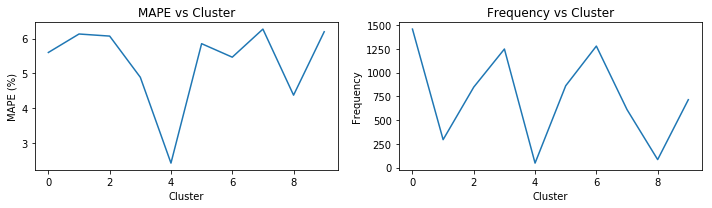

In [37]:
#Plot average mape/frequency of each cluster
fig, ax= plt.subplots(1, 2,tight_layout=True, figsize= (10,3))
ax[0].plot(np.linspace(0,9,10),MAPE)
#plt.plot(history.history['mean_ape'])
ax[0].set_title('MAPE vs Cluster')
ax[0].set_ylabel('MAPE (%)')
ax[0].set_xlabel('Cluster')
ax[1].plot(np.linspace(0,9,10),numb)
#plt.plot(history.history['mean_ape'])
ax[1].set_title('Frequency vs Cluster')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Cluster')